# EXPLORATORY DATA ANALYSIS

In [70]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
from helpers import data_preparation
from scipy import stats

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [71]:
df = pd.read_csv('datasets/database-1701392111.8423762.csv')

In [72]:
df.head()

,Unnamed: 0,URL,Fabricante,Modelo,Versao,Valor,Cidade,Ano,Combustível,Placa final,...,Lanternas traseiras de led,Sensor crepuscular,Banco do passageiro com ajuste elétrico,Veículo alienado,Bancos dianteiros com aquecimento,Pneus de uso off-road,Park assist paralelo,Calha de chuva,Freio a disco dianteiro,Ar quente (ar-condicionado)
0,0,https://www.mobiauto.com.br/comprar/carros/ba-...,Toyota,Hilux SW4,SRV 4x4 3.0 Turbo (aut)2,R$ 79.900,Lauro de Freitas - BA,2009/2009,Diesel,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,https://www.mobiauto.com.br/comprar/carros/ba-...,Volkswagen,T-Cross,1.0 200 TSI Comfortline (Aut) (Flex),R$ 110.900,Salvador - BA,2021/2022,Flex,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,https://www.mobiauto.com.br/comprar/carros/ba-...,Volkswagen,T-Cross,1.0 200 TSI Comfortline (Aut) (Flex),R$ 107.000,Salvador - BA,2021/2022,Flex,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,https://www.mobiauto.com.br/comprar/carros/ba-...,Volkswagen,Taos,Highline 1.4 TSI (Aut) (Flex),R$ 164.900,Salvador - BA,2021/2022,Flex,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,https://www.mobiauto.com.br/comprar/carros/ba-...,Volkswagen,T-Cross,1.0 200 TSI Comfortline (Aut) (Flex),R$ 112.900,Salvador - BA,2021/2022,Flex,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [73]:
df2 = data_preparation(df)

KeyboardInterrupt: 

In [ ]:
df2.head()

,Fabricante,Modelo,Versao,Valor,Cidade,Combustível,KM,Câmbio,Cor,Carroceria,...,Sensor crepuscular,Banco do passageiro com ajuste elétrico,Veículo alienado,Bancos dianteiros com aquecimento,Pneus de uso off-road,Park assist paralelo,Calha de chuva,Freio a disco dianteiro,Ar quente (ar-condicionado),Model year
0,Toyota,Hilux SW4,SRV 4x4 3.0 Turbo (aut)2,79900,Lauro de Freitas - BA,Diesel,270000,Automática,Prata,SUV,...,Não,Não,Não,Não,Não,Não,Não,Não,Não,2009
1,Volkswagen,T-Cross,1.0 200 TSI Comfortline (Aut) (Flex),110900,Salvador - BA,Flex,30016,Automática,Prata,SUV,...,Não,Não,Não,Não,Não,Não,Não,Não,Não,2022
2,Volkswagen,T-Cross,1.0 200 TSI Comfortline (Aut) (Flex),107000,Salvador - BA,Flex,3617,Automática,Branco,SUV,...,Não,Não,Não,Não,Não,Não,Não,Não,Não,2022
3,Volkswagen,Taos,Highline 1.4 TSI (Aut) (Flex),164900,Salvador - BA,Flex,23608,Automática,Azul,Não,...,Sim,Não,Não,Não,Não,Não,Não,Não,Não,2022
4,Volkswagen,T-Cross,1.0 200 TSI Comfortline (Aut) (Flex),112900,Salvador - BA,Flex,7972,Automática,Branco,SUV,...,Não,Não,Não,Não,Não,Não,Não,Não,Não,2022


In [ ]:
df2.isnull().sum().sum()

0

In [ ]:
num_variables = df2.select_dtypes(['int64']).columns.tolist()
num_variables

['Valor', 'KM', 'Model year']

In [ ]:
cat_variables = df2.select_dtypes('object').columns.tolist()
cat_variables

['Fabricante',
 'Modelo',
 'Versao',
 'Cidade',
 'Combustível',
 'Câmbio',
 'Cor',
 'Carroceria',
 'Airbag motorista',
 'Ar-condicionado',
 'Direção hidráulica',
 'Vidros elétricos dianteiros',
 'Travas elétricas',
 'Retrovisores elétricos',
 'Alarme',
 'Freios abs',
 'Bancos de couro',
 'Airbag duplo frontal',
 'Limpador traseiro',
 'Desembaçador traseiro',
 'Câmbio automático',
 'Rodas de liga leve',
 'Tração 4x4',
 'Ar quente',
 'Airbags laterais',
 'Vidros elétricos traseiros',
 'Banco do motorista com regulagem de altura',
 'Ajuste elétrico dos retrovisores',
 'Adaptado para pcd',
 'Sensor de estacionamento dianteiro',
 'Direção elétrica',
 'Kit visibilidade',
 'Sensor de estacionamento traseiro',
 'Aceita troca',
 'Ipva pago',
 'Motorização',
 'Potência (cv)',
 'Torque (kgf.m)',
 'Velocidade máxima (km/h)',
 'Tempo 0-100 (s)',
 'Consumo cidade (km/l)',
 'Consumo estrada (km/l)',
 'Tração',
 'Direção',
 'Suspensão dianteira',
 'Suspensão traseira',
 'Freios dianteiros',
 'Freios t

In [ ]:
corr = df2[num_variables].corr()
corr

,Valor,KM,Model year
Valor,1.000000,-0.146823,0.309554
KM,-0.146823,1.000000,-0.522554
Model year,0.309554,-0.522554,1.000000


<Axes: >

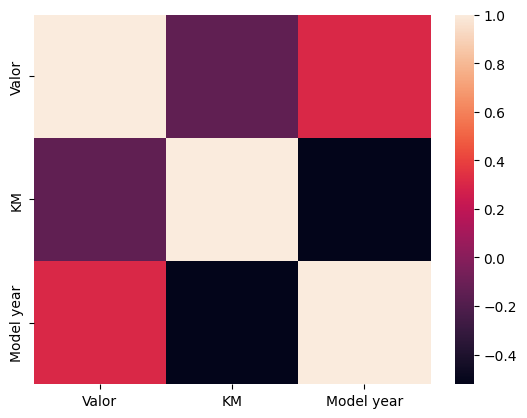

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(corr)

In [ ]:
df2['KM']

0       270000
1        30016
2         3617
3        23608
4         7972
         ...  
3195     65456
3196         1
3197     45660
3198     20000
3199     63000
Name: KM, Length: 3195, dtype: int64

In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

df2.drop(df2[df2['KM'] > 1000000].index, inplace=True)
X = df2.drop('Valor', axis=1)
y = df2['Valor']

In [ ]:
num_variables = X.select_dtypes(['int64']).columns.tolist()
cat_variables = X.select_dtypes('object').columns.tolist()

X[cat_variables] = X[cat_variables].astype(str)

ct = ColumnTransformer([('num', StandardScaler(), num_variables),
                        ('cat', OneHotEncoder(), cat_variables)])

X_trans = ct.fit_transform(X)

In [ ]:
X_trans.shape

(3195, 6029)

In [ ]:
len(columns)

6027

In [ ]:
X_trans.toarray().shape

(3195, 6029)

In [ ]:
num_columns = ct.named_transformers_['num'].get_feature_names_out().tolist()
cat_columns = ct.named_transformers_['cat'].get_feature_names_out().tolist()

In [ ]:
num_columns+cat_columns

['KM',
 'Model year',
 'Fabricante_Audi',
 'Fabricante_BMW',
 'Fabricante_CAOA Chery',
 'Fabricante_Chevrolet',
 'Fabricante_Chrysler',
 'Fabricante_Citroën',
 'Fabricante_Dodge',
 'Fabricante_Effa',
 'Fabricante_Fiat',
 'Fabricante_Ford',
 'Fabricante_Honda',
 'Fabricante_Hyundai',
 'Fabricante_JAC',
 'Fabricante_Jaguar',
 'Fabricante_Jeep',
 'Fabricante_Kia',
 'Fabricante_Land Rover',
 'Fabricante_Lexus',
 'Fabricante_Lifan',
 'Fabricante_MINI',
 'Fabricante_Mercedes-Benz',
 'Fabricante_Mitsubishi',
 'Fabricante_Nissan',
 'Fabricante_Peugeot',
 'Fabricante_Porsche',
 'Fabricante_RAM',
 'Fabricante_Renault',
 'Fabricante_SsangYong',
 'Fabricante_Suzuki',
 'Fabricante_Toyota',
 'Fabricante_Troller',
 'Fabricante_Volkswagen',
 'Fabricante_Volvo',
 'Modelo_118i',
 'Modelo_125i',
 'Modelo_2008',
 'Modelo_207',
 'Modelo_207 Sedan',
 'Modelo_208',
 'Modelo_2500',
 'Modelo_3008',
 'Modelo_300C',
 'Modelo_308',
 'Modelo_320i',
 'Modelo_3500',
 'Modelo_408',
 'Modelo_430i Cabriolet',
 'Modelo_

In [ ]:
X_trans = pd.DataFrame(X_trans.toarray(), columns=(num_columns+cat_columns))
X_trans

,KM,Model year,Fabricante_Audi,Fabricante_BMW,Fabricante_CAOA Chery,Fabricante_Chevrolet,Fabricante_Chrysler,Fabricante_Citroën,Fabricante_Dodge,Fabricante_Effa,...,Pneus de uso off-road_Não,Pneus de uso off-road_Sim,Park assist paralelo_Não,Park assist paralelo_Sim,Calha de chuva_Não,Calha de chuva_Sim,Freio a disco dianteiro_Não,Freio a disco dianteiro_Sim,Ar quente (ar-condicionado)_Não,Ar quente (ar-condicionado)_Sim
0,4.916245,-2.837936,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,-0.584897,1.001597,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,-1.190040,1.001597,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,-0.731787,1.001597,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,-1.090210,1.001597,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3190,0.227493,0.706248,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3191,-1.272929,-1.361192,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3192,-0.226290,-1.065844,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3193,-0.814493,-0.770495,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [ ]:
len(columns)

6027

<Axes: xlabel='KM', ylabel='Count'>

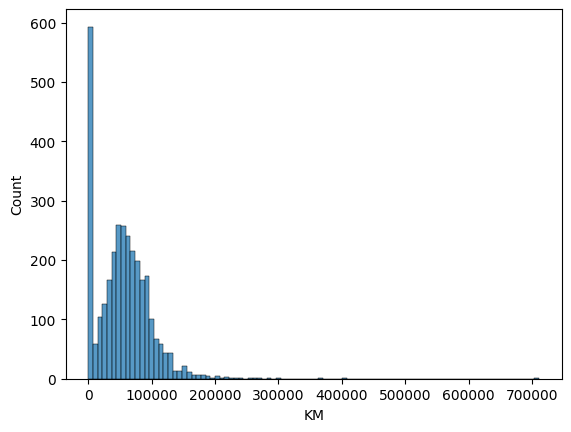

In [ ]:
sns.histplot(X['KM'])

In [ ]:
X_trans.iloc[:,2:]

,Fabricante_Audi,Fabricante_BMW,Fabricante_CAOA Chery,Fabricante_Chevrolet,Fabricante_Chrysler,Fabricante_Citroën,Fabricante_Dodge,Fabricante_Effa,Fabricante_Fiat,Fabricante_Ford,...,Pneus de uso off-road_Não,Pneus de uso off-road_Sim,Park assist paralelo_Não,Park assist paralelo_Sim,Calha de chuva_Não,Calha de chuva_Sim,Freio a disco dianteiro_Não,Freio a disco dianteiro_Sim,Ar quente (ar-condicionado)_Não,Ar quente (ar-condicionado)_Sim
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3190,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3191,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3192,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3193,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [ ]:
from sklearn.feature_selection import VarianceThreshold

sel = VarianceThreshold(threshold=(.8*(1-.8)))

X_sel = sel.fit_transform(X_trans.iloc[:,2:])
X_sel

array([[1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 1., ..., 0., 1., 0.],
       ...,
       [0., 1., 1., ..., 0., 1., 0.],
       [1., 0., 1., ..., 0., 1., 0.],
       [1., 0., 1., ..., 0., 1., 0.]])

In [ ]:
X_sel.shape

(3195, 99)

In [78]:
X_trans.iloc[:,:2].columns.tolist()+['a']

['KM', 'Model year', 'a']

In [74]:
X_sel2 = np.concatenate((X_trans.iloc[:,:2].values, X_sel), axis=1)

In [82]:
X_sel2

array([[ 4.91624477, -2.83793562,  1.        , ...,  0.        ,
         1.        ,  0.        ],
       [-0.58489666,  1.00159715,  1.        , ...,  0.        ,
         1.        ,  0.        ],
       [-1.19003964,  1.00159715,  1.        , ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.22629002, -1.06584357,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       [-0.81449294, -0.7704949 ,  1.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.17119395, -1.36119225,  1.        , ...,  0.        ,
         1.        ,  0.        ]])

In [81]:
sel2_columns = X_trans.iloc[:,:2].columns.tolist()+sel.get_feature_names_out().tolist()

In [83]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(max_depth=5)
rf_model.fit(X_sel2, y)

RandomForestRegressor(max_depth=5)

In [84]:
y_pred = rf_model.predict(X_sel2)

In [89]:
rf_model.score(X_sel2, y)

0.6049364063175098

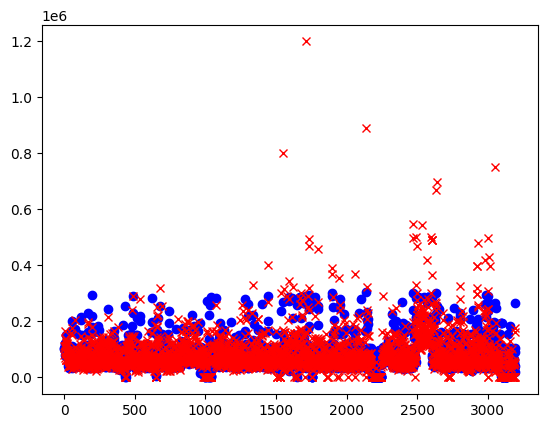

In [88]:
import matplotlib.pyplot as plt

plt.plot(range(len(y_pred)), y_pred, 'bo')
plt.plot(range(len(y_pred)), y, 'rx')